In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [6]:
def filter_stopwords(data):
    file = open('raw-data/stop_words.txt', 'r')
    stop_words = file.readlines()
    stop_words = [x.replace('\r\n','') for x in stop_words]
    return data[~data['tag'].isin(stop_words)]

In [2]:
tags = pd.read_csv('raw-data/tag.csv', dtype=object)
tags.head()

,tag,id_post
0,tasselearrings,1636842385063323219
1,gxgcollective,1636842385063323219
2,australianbrand,1636842385063323219
3,gxgcollective,1636667639059249501
4,wanderlust,1636667639059249501


In [7]:
tags = filter_stopwords(tags)

In [51]:
tags_freq = tags.groupby(by='tag').count().reset_index()
tags_freq.columns = ['tag', 'tag_frequency']

In [13]:
post = pd.read_csv('raw-data/post.csv', sep='\t', dtype=object)[['id_post', 'taken_at_time', 'username']]
post.head()

,id_post,taken_at_time,username
0,1636842385063323219,2017-10-30 08:00:39,gxgcollective
1,1636667639059249501,2017-10-30 02:13:28,gxgcollective
2,1635907116583816031,2017-10-29 02:02:26,gxgcollective
3,1635853795965600449,2017-10-29 00:16:30,gxgcollective
4,1635593889484344162,2017-10-28 15:40:07,gxgcollective


In [14]:
usertags = tags.merge(post, on='id_post')
usertags.shape

(1351134, 4)

In [15]:
usertags.drop_duplicates(subset=['tag', 'username'], inplace=True)

In [16]:
taguser_distr = usertags.groupby('tag')[['id_post']].count()
taguser_distr.columns = ['#users']
taguser_distr.sort_values(by='#users', ascending=False, inplace=True)

In [17]:
relevant_tags = list(taguser_distr[taguser_distr['#users'] > 1].index)
relevant_tags[:10]

['summer',
 'art',
 'sunset',
 'beach',
 'spring',
 'flowers',
 'nature',
 'friends',
 'design',
 'blue']

In [18]:
tags_time = tags.merge(post[['id_post', 'taken_at_time']], on='id_post')
tags_time.shape

(1351134, 3)

In [19]:
tags_time['date'] = pd.to_datetime(tags_time['taken_at_time'])

In [20]:
tags_time = tags_time[tags_time['tag'].isin(relevant_tags)]
tags_time.shape

(993038, 4)

In [21]:
len(tags_time['tag'].unique())

34262

In [26]:
max_tag_dates = tags_time.groupby(by='tag')['date'].max().reset_index()
min_tag_dates = tags_time.groupby(by='tag')['date'].min().reset_index()

In [27]:
max_tag_dates.columns = ['tag', 'max_date']
min_tag_dates.columns = ['tag', 'min_date']

In [28]:
tags_t_distr = max_tag_dates.merge(min_tag_dates, on='tag')
tags_t_distr.head()

,tag,max_date,min_date
0,aa,2017-10-31 07:10:55,2017-06-04 22:49:52
1,aaknopf,2017-08-03 16:28:42,2017-02-09 17:50:56
2,aarhus,2017-07-27 21:37:20,2017-07-08 22:32:14
3,abalone,2017-08-22 16:41:59,2017-03-02 13:15:09
4,abandoned,2017-07-29 09:09:47,2017-01-03 13:06:21


In [31]:
tags_t_distr['delta'] = tags_t_distr.apply(lambda x: (x['max_date'] - x['min_date']).days+1, axis=1)
tags_t_distr.head()

,tag,max_date,min_date,delta
0,aa,2017-10-31 07:10:55,2017-06-04 22:49:52,149
1,aaknopf,2017-08-03 16:28:42,2017-02-09 17:50:56,175
2,aarhus,2017-07-27 21:37:20,2017-07-08 22:32:14,19
3,abalone,2017-08-22 16:41:59,2017-03-02 13:15:09,174
4,abandoned,2017-07-29 09:09:47,2017-01-03 13:06:21,207


In [32]:
tags_t_distr.sort_values(by='delta')

,tag,max_date,min_date,delta
30433,thetragicallyhip,2017-10-19 03:26:38,2017-10-18 18:13:35,1
13494,hellomay,2017-05-01 09:50:30,2017-05-01 07:13:17,1
13496,hellooctober,2017-10-01 12:30:43,2017-10-01 10:20:38,1
13498,helloseptember,2017-09-01 12:40:57,2017-09-01 09:22:36,1
25286,repurposed,2017-10-11 13:59:58,2017-10-11 13:15:09,1
13570,hermeshome,2017-04-06 01:48:16,2017-04-05 06:42:07,1
31081,transrightsarehumanrights,2017-07-27 23:45:00,2017-07-27 01:23:17,1
31058,trandy,2017-01-27 14:00:43,2017-01-27 13:59:57,1
13616,hidrellez,2017-05-05 17:13:45,2017-05-04 22:17:32,1
7673,dazed,2017-06-23 20:49:03,2017-06-23 14:31:18,1


[Text(0,0,'1'),
 Text(0,0,'21'),
 Text(0,0,'41'),
 Text(0,0,'61'),
 Text(0,0,'81'),
 Text(0,0,'101'),
 Text(0,0,'121'),
 Text(0,0,'141'),
 Text(0,0,'161'),
 Text(0,0,'181'),
 Text(0,0,'201'),
 Text(0,0,'221'),
 Text(0,0,'241'),
 Text(0,0,'261'),
 Text(0,0,'281'),
 Text(0,0,'301')]

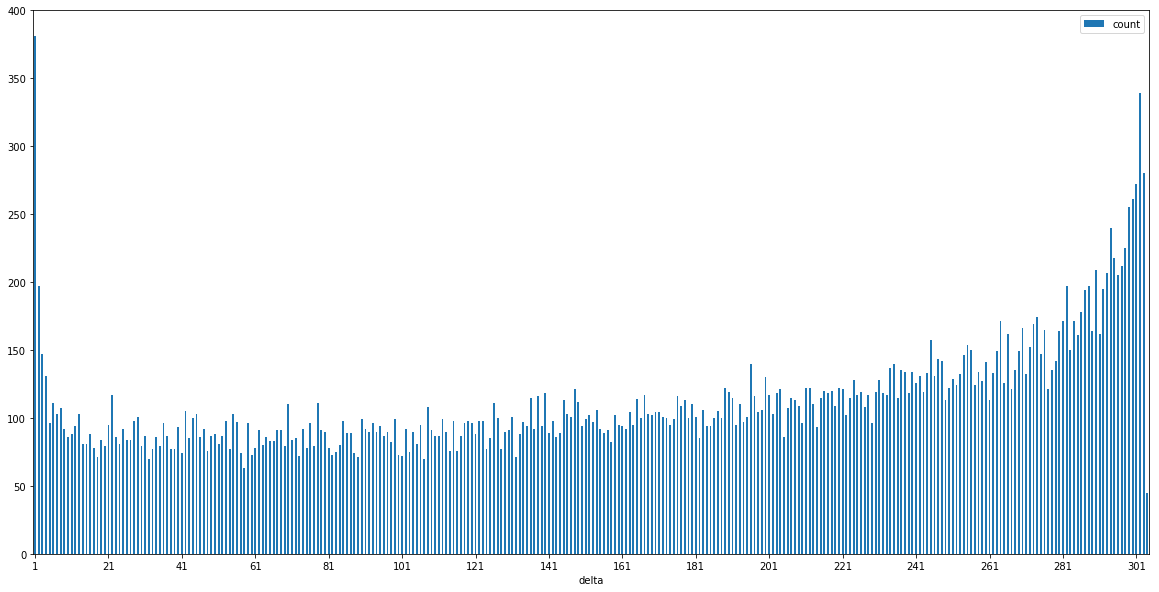

In [43]:
delta_distr = tags_t_distr.groupby(by='delta')['tag'].count().reset_index()
delta_distr.set_index('delta', inplace=True)
delta_distr.columns = ['count']

sl = [i for i in range(0, 305, 20)]
ax = delta_distr.plot(kind='bar', figsize=(20,10))
ax.set_xticks(sl)
ax.set_xticklabels(delta_distr.index[sl], rotation=0)

In [41]:
sl

[0]

In [44]:
tags_t_distr[tags_t_distr['delta'] <= 10]

,tag,max_date,min_date,delta
85,aceandjig,2017-04-03 17:12:05,2017-03-30 00:46:07,5
133,adalet,2017-07-09 14:47:29,2017-07-09 13:58:19,1
135,adamwest,2017-06-19 07:19:08,2017-06-11 00:43:01,9
139,adaywithoutwomen,2017-03-10 05:31:45,2017-03-07 01:30:11,4
140,addesignshow2017,2017-03-24 16:55:03,2017-03-17 20:04:09,7
151,addtowishlist,2017-09-10 22:07:52,2017-09-07 20:51:39,4
243,afl,2017-10-01 06:27:16,2017-09-29 01:22:46,3
284,afterpayday,2017-08-30 13:16:50,2017-08-30 10:17:27,1
302,agaveholic,2017-09-27 10:25:05,2017-09-25 21:33:53,2
304,agavesofinstagram,2017-09-27 10:25:05,2017-09-25 21:33:53,2


In [55]:
taguser_distr[taguser_distr.index == 'sagawards']

,#users
tag,
sagawards,4


In [54]:
output = tags_freq.merge(tags_t_distr, on='tag')
output['metric'] = output.apply(lambda x: float(x['tag_frequency'])/x['delta'], axis=1)
output.sort_values(by='metric', ascending=False)

,tag,tag_frequency,max_date,min_date,delta,metric
26016,sagawards,29,2017-01-30 17:36:28,2017-01-30 01:12:31,1,29.000000
29004,summer,5099,2017-10-30 18:22:11,2017-01-01 18:34:38,302,16.884106
14876,inspiration,4985,2017-10-31 10:54:09,2017-01-01 04:26:40,304,16.398026
20763,nationalpuppyday,30,2017-03-24 13:36:50,2017-03-23 11:27:33,2,15.000000
7882,design,4427,2017-10-31 09:08:27,2017-01-01 02:03:24,304,14.562500
1268,art,4263,2017-10-30 23:12:36,2017-01-01 10:05:59,303,14.069307
15150,interiordesign,3978,2017-10-31 09:05:05,2017-01-01 03:45:58,304,13.085526
13235,happywomensday,13,2017-03-08 19:51:24,2017-03-08 05:48:20,1,13.000000
17291,lifestyle,3654,2017-10-31 10:54:09,2017-01-01 10:05:59,304,12.019737
30898,torontointernationalfilmfestival,24,2017-09-14 22:31:46,2017-09-13 17:47:50,2,12.000000


In [64]:
output.sort_values(by='metric', ascending=False)[:2000]

,tag,tag_frequency,max_date,min_date,delta,metric
26016,sagawards,29,2017-01-30 17:36:28,2017-01-30 01:12:31,1,29.000000
29004,summer,5099,2017-10-30 18:22:11,2017-01-01 18:34:38,302,16.884106
14876,inspiration,4985,2017-10-31 10:54:09,2017-01-01 04:26:40,304,16.398026
20763,nationalpuppyday,30,2017-03-24 13:36:50,2017-03-23 11:27:33,2,15.000000
7882,design,4427,2017-10-31 09:08:27,2017-01-01 02:03:24,304,14.562500
1268,art,4263,2017-10-30 23:12:36,2017-01-01 10:05:59,303,14.069307
15150,interiordesign,3978,2017-10-31 09:05:05,2017-01-01 03:45:58,304,13.085526
13235,happywomensday,13,2017-03-08 19:51:24,2017-03-08 05:48:20,1,13.000000
17291,lifestyle,3654,2017-10-31 10:54:09,2017-01-01 10:05:59,304,12.019737
30898,torontointernationalfilmfestival,24,2017-09-14 22:31:46,2017-09-13 17:47:50,2,12.000000
